In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cluster import DBSCAN
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import RandomizedSearchCV
from copy import deepcopy
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, QuantileTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.metrics import silhouette_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.compose import TransformedTargetRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from copy import deepcopy
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')
import xgboost
from xgboost import XGBRegressor

In [166]:
df = pd.read_excel('player_stat — копия1.xlsx')

In [167]:
df

,Игрок,Игры,Очки,% 2-х очковых,% 3-х очковых,% с игры,% штрафных,Передачи,Подборы,Перехваты,Потери,Блокшоты,Фолы,Позиция
0,Айткали Руслан,17.0,49.0,71.4,25.7,38.8,50.0,9.0,22.0,6.0,12.0,NaN,22.0,Нападающий
1,Алексеев Даниил,9.0,1.0,NaN,NaN,NaN,50.0,NaN,3.0,NaN,1.0,NaN,3.0,Нападающий - центр
2,Антипов Павел,20.0,73.0,40.0,37.2,38.2,55.6,14.0,48.0,NaN,15.0,3.0,32.0,Нападающий
3,Антонов Семен,31.0,238.0,51.3,40.6,45.1,78.4,29.0,91.0,27.0,27.0,24.0,74.0,Нападающий - центр
4,Апшоу Роберт,3.0,27.0,52.2,NaN,52.2,37.5,NaN,11.0,1.0,6.0,1.0,12.0,Центровой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Ыдырысжан Алижан,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Нападающий
199,Эрнандес-Зиненко Дарол,17.0,82.0,50.0,60.0,51.7,45.2,28.0,87.0,18.0,18.0,6.0,60.0,Центровой
200,Юшкявичюс Адас,8.0,88.0,51.9,35.7,42.0,78.9,34.0,19.0,5.0,24.0,NaN,21.0,Нападающий - центр
201,Якушин Тимофей,18.0,108.0,40.0,31.5,35.6,73.9,32.0,39.0,7.0,31.0,NaN,44.0,Защитник


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Игрок          203 non-null    object 
 1   Игры           203 non-null    float64
 2   Очки           190 non-null    float64
 3   % 2-х очковых  178 non-null    float64
 4   % 3-х очковых  149 non-null    float64
 5   % с игры       184 non-null    float64
 6   % штрафных     175 non-null    float64
 7   Передачи       178 non-null    float64
 8   Подборы        185 non-null    float64
 9   Перехваты      167 non-null    float64
 10  Потери         182 non-null    float64
 11  Блокшоты       120 non-null    float64
 12  Фолы           191 non-null    float64
 13  Позиция        199 non-null    object 
dtypes: float64(12), object(2)
memory usage: 22.3+ KB


In [169]:
df = df[df['Очки'].notna()]

In [170]:
df = df.fillna((df.mean().round(1)))

In [171]:
df = df[df['Позиция'].notna()]
df = df.drop(df[df['Позиция'] == 'gg'].index)
dummies = pd.get_dummies(df['Позиция'])
df = pd.concat([df, dummies], axis=1)
df.drop(['Позиция'], inplace=True, axis=1)

<AxesSubplot:>

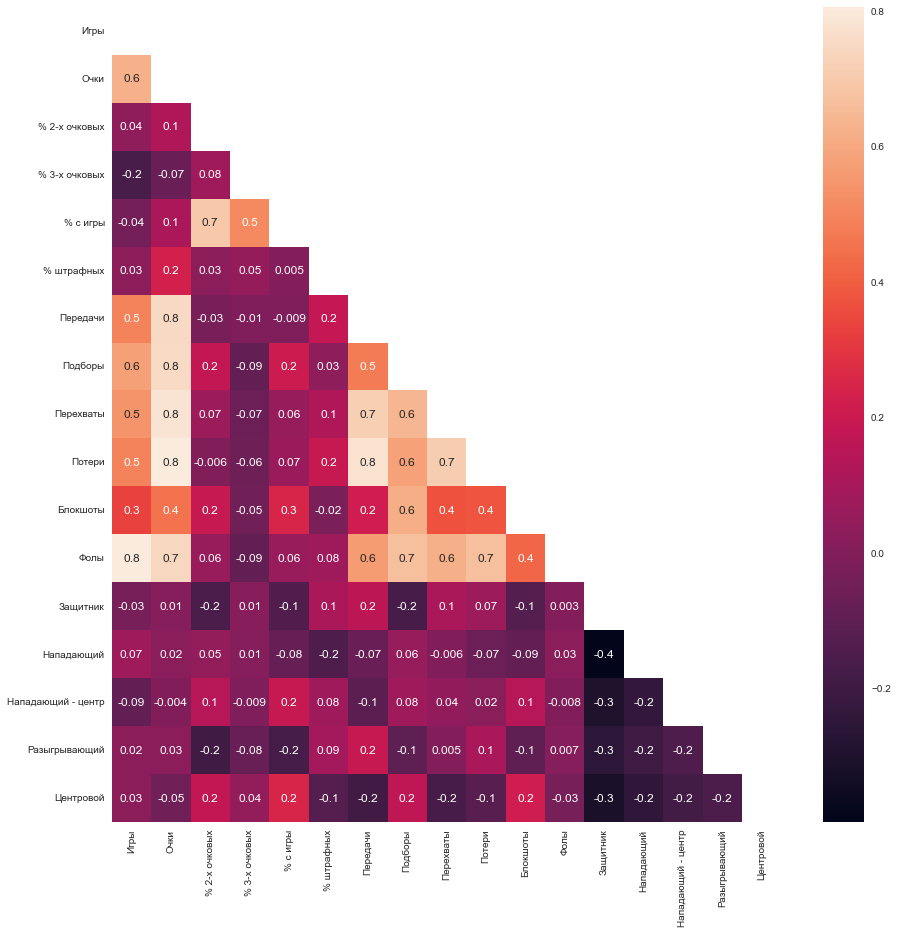

In [172]:
fig, ax = plt.subplots(figsize=(15,15))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix, fmt='.1g')

Correlation analysis:
1) We can see that we have a positive strong correlation between the number of games played and score (aswell as number of passes, rebounds (подборы), steals (перехваты), turnovers (потери) and fouls)

2) The score has the a very strong positive correlation with the same features as the number of games played

3) The number of passes has a relatively strong correlation with rebounds, steals, turnovers and fouls.

4) The number of rebounds has a relatively strong correlation with passes, steals, turnovers and fouls and block shots

5) The same goes for steals and turnovers, however the do not correlate with block shots

In [161]:
X = df.drop(['Очки', 'Игрок'], axis=1)
y = df['Очки']

In [130]:
cv = KFold(n_splits=10, shuffle=False)
sfs1 = SFS(RandomForestRegressor(), 
           k_features=X.shape[1], 
           forward=True, 
           scoring='r2',
           cv=cv)

sfs1.fit(X,y)

sfs1.subsets_

{1: {'feature_idx': (8,),
  'cv_scores': array([0.39593544, 0.7019846 , 0.64795088, 0.45722811, 0.70332781,
         0.57295276, 0.28639061, 0.60545818, 0.80834213, 0.91544632]),
  'avg_score': 0.60950168464825,
  'feature_names': ('Потери',)},
 2: {'feature_idx': (3, 8),
  'cv_scores': array([0.51424093, 0.65872334, 0.87826707, 0.49053546, 0.76701894,
         0.73636132, 0.44943402, 0.72274883, 0.91456822, 0.89508683]),
  'avg_score': 0.7026984955458839,
  'feature_names': ('% с игры', 'Потери')},
 3: {'feature_idx': (3, 7, 8),
  'cv_scores': array([0.63342529, 0.70922873, 0.61881207, 0.70505566, 0.85464038,
         0.78742853, 0.76705472, 0.62433009, 0.93787068, 0.92339467]),
  'avg_score': 0.7561240836168323,
  'feature_names': ('% с игры', 'Перехваты', 'Потери')},
 4: {'feature_idx': (3, 4, 7, 8),
  'cv_scores': array([0.68758289, 0.73200904, 0.61773014, 0.74349997, 0.91004768,
         0.78660342, 0.76160794, 0.7223951 , 0.90786894, 0.90413109]),
  'avg_score': 0.777347620879146

In [131]:
max_ = -9999
index = 0
for i in sfs1.subsets_:
    if sfs1.subsets_[i]['avg_score'] > max_:
        max_ = sfs1.subsets_[i]['avg_score']
        index = i
print(max_, index)

0.7973400824070765 7


In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [163]:
cols = ['% 2-х очковых',
   '% с игры',
   '% штрафных',
   'Подборы',
   'Перехваты',
   'Потери',
   'Фолы']

In [164]:
X_sel = X[cols]

In [17]:
hyperparameter_grid = {
    'n_estimators': [100, 500, 900, 1100, 1500],
    'max_depth': [2, 3, 5, 10, 15],
    'learning_rate': [0.05, 0.1, 0.15, 0.20],
    'min_child_weight': [1, 2, 3, 4]
}
cv = RandomizedSearchCV(estimator=XGBRegressor(),
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'r2',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

cv.fit(X, y)

cv.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=900, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [136]:
scores = cross_val_score(XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1,
             monotone_constraints='()', n_estimators=900, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None), X, y, cv=5)
np.mean(scores)

0.7823772770376721

In [19]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X, y)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [165]:
scores = cross_val_score(RandomForestRegressor(n_estimators=2000, min_samples_leaf=1, min_samples_split=2, max_features='sqrt',
                                              max_depth=20, bootstrap=True), X_sel, y, cv=5)
np.mean(scores)

0.8069299641787528

In [135]:
regr = RandomForestRegressor(n_estimators=2000, min_samples_leaf=1, min_samples_split=2, max_features='sqrt',
                                              max_depth=20, bootstrap=True)
regr.fit(X_train, y_train)
pred = regr.predict(X_test)

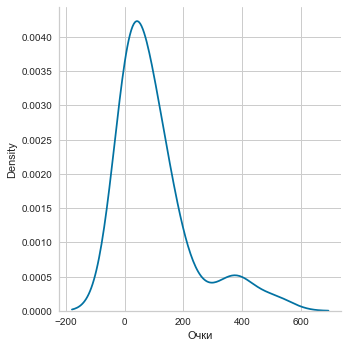

In [137]:
sns.displot(y_test, kind="kde")

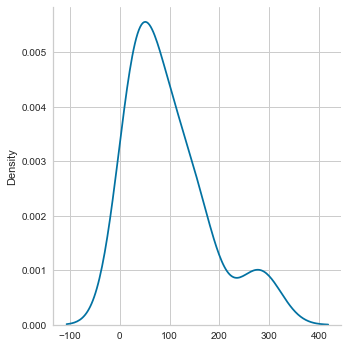

In [138]:
sns.displot(pred, kind="kde")

In [173]:
df['Среднее кол-во очков'] = df['Очки'] / df['Игры']
df['Среднее кол-во очков'] = df['Среднее кол-во очков'].round(1)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 202
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Игрок                 186 non-null    object 
 1   Игры                  186 non-null    float64
 2   Очки                  186 non-null    float64
 3   % 2-х очковых         186 non-null    float64
 4   % 3-х очковых         186 non-null    float64
 5   % с игры              186 non-null    float64
 6   % штрафных            186 non-null    float64
 7   Передачи              186 non-null    float64
 8   Подборы               186 non-null    float64
 9   Перехваты             186 non-null    float64
 10  Потери                186 non-null    float64
 11  Блокшоты              186 non-null    float64
 12  Фолы                  186 non-null    float64
 13  Защитник              186 non-null    uint8  
 14  Нападающий            186 non-null    uint8  
 15  Нападающий - центр    1

# Data Analysis

In [175]:
columns = ['Защитник', 'Нападающий', 'Нападающий - центр', 'Разыгрывающий', 'Центровой']

In [176]:
positions = {}
for col in columns:
    positions[col] = df[df[col] == 1]
    positions[col].drop(columns = columns, inplace=True)

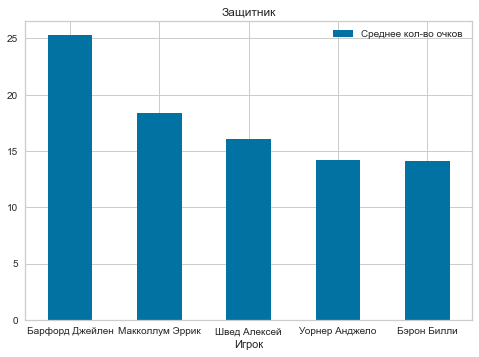

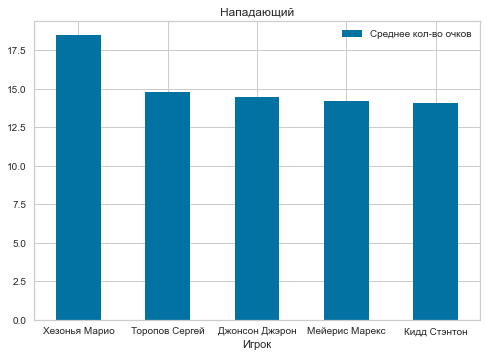

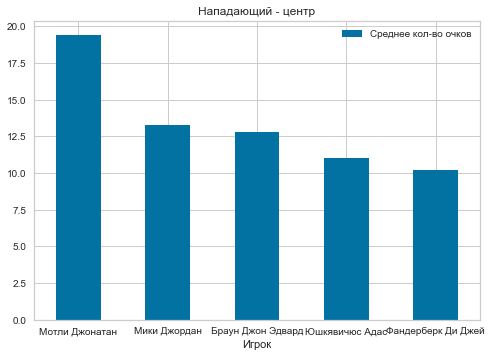

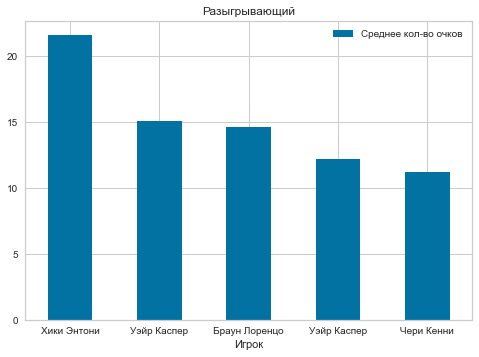

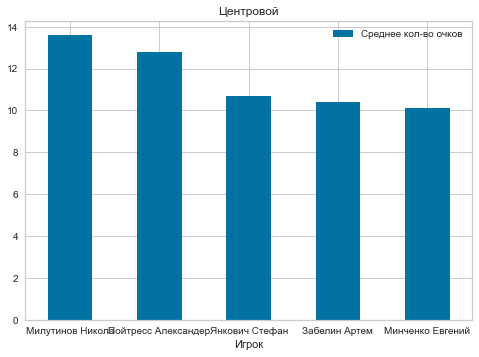

In [177]:
for key in positions:
    df_temp_col = positions[key]
    df_temp_col.sort_values(by='Среднее кол-во очков', ascending=False, inplace=True)
    df_temp_col = df_temp_col.head(5)
    df_temp_col.plot.bar(x='Игрок', y='Среднее кол-во очков', rot=0)
    plt.title(key)

### Защитник

In [178]:
positions['Защитник'].describe()

,Игры,Очки,% 2-х очковых,% 3-х очковых,% с игры,% штрафных,Передачи,Подборы,Перехваты,Потери,Блокшоты,Фолы,Среднее кол-во очков
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,14.380952,104.857143,48.058730,36.666667,42.484127,77.622222,30.761905,31.993651,11.801587,19.228571,4.104762,27.990476,6.960317
std,8.533480,104.727736,10.768976,11.359151,11.176866,15.344269,31.797806,28.735719,8.474601,15.204280,2.239126,20.543492,5.018853
min,1.000000,1.000000,16.700000,15.400000,19.500000,33.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000
25%,8.000000,31.000000,44.050000,30.800000,37.300000,73.600000,12.500000,10.500000,5.500000,10.000000,2.000000,13.000000,3.100000
50%,13.000000,90.000000,48.300000,36.200000,41.300000,80.000000,22.000000,22.000000,10.500000,17.000000,4.900000,24.000000,6.000000
75%,20.500000,135.500000,51.450000,40.000000,45.550000,88.550000,41.500000,44.000000,14.500000,25.000000,4.900000,41.500000,10.700000
max,32.000000,514.000000,100.000000,100.000000,100.000000,100.000000,175.000000,148.000000,42.000000,76.000000,13.000000,84.000000,25.300000


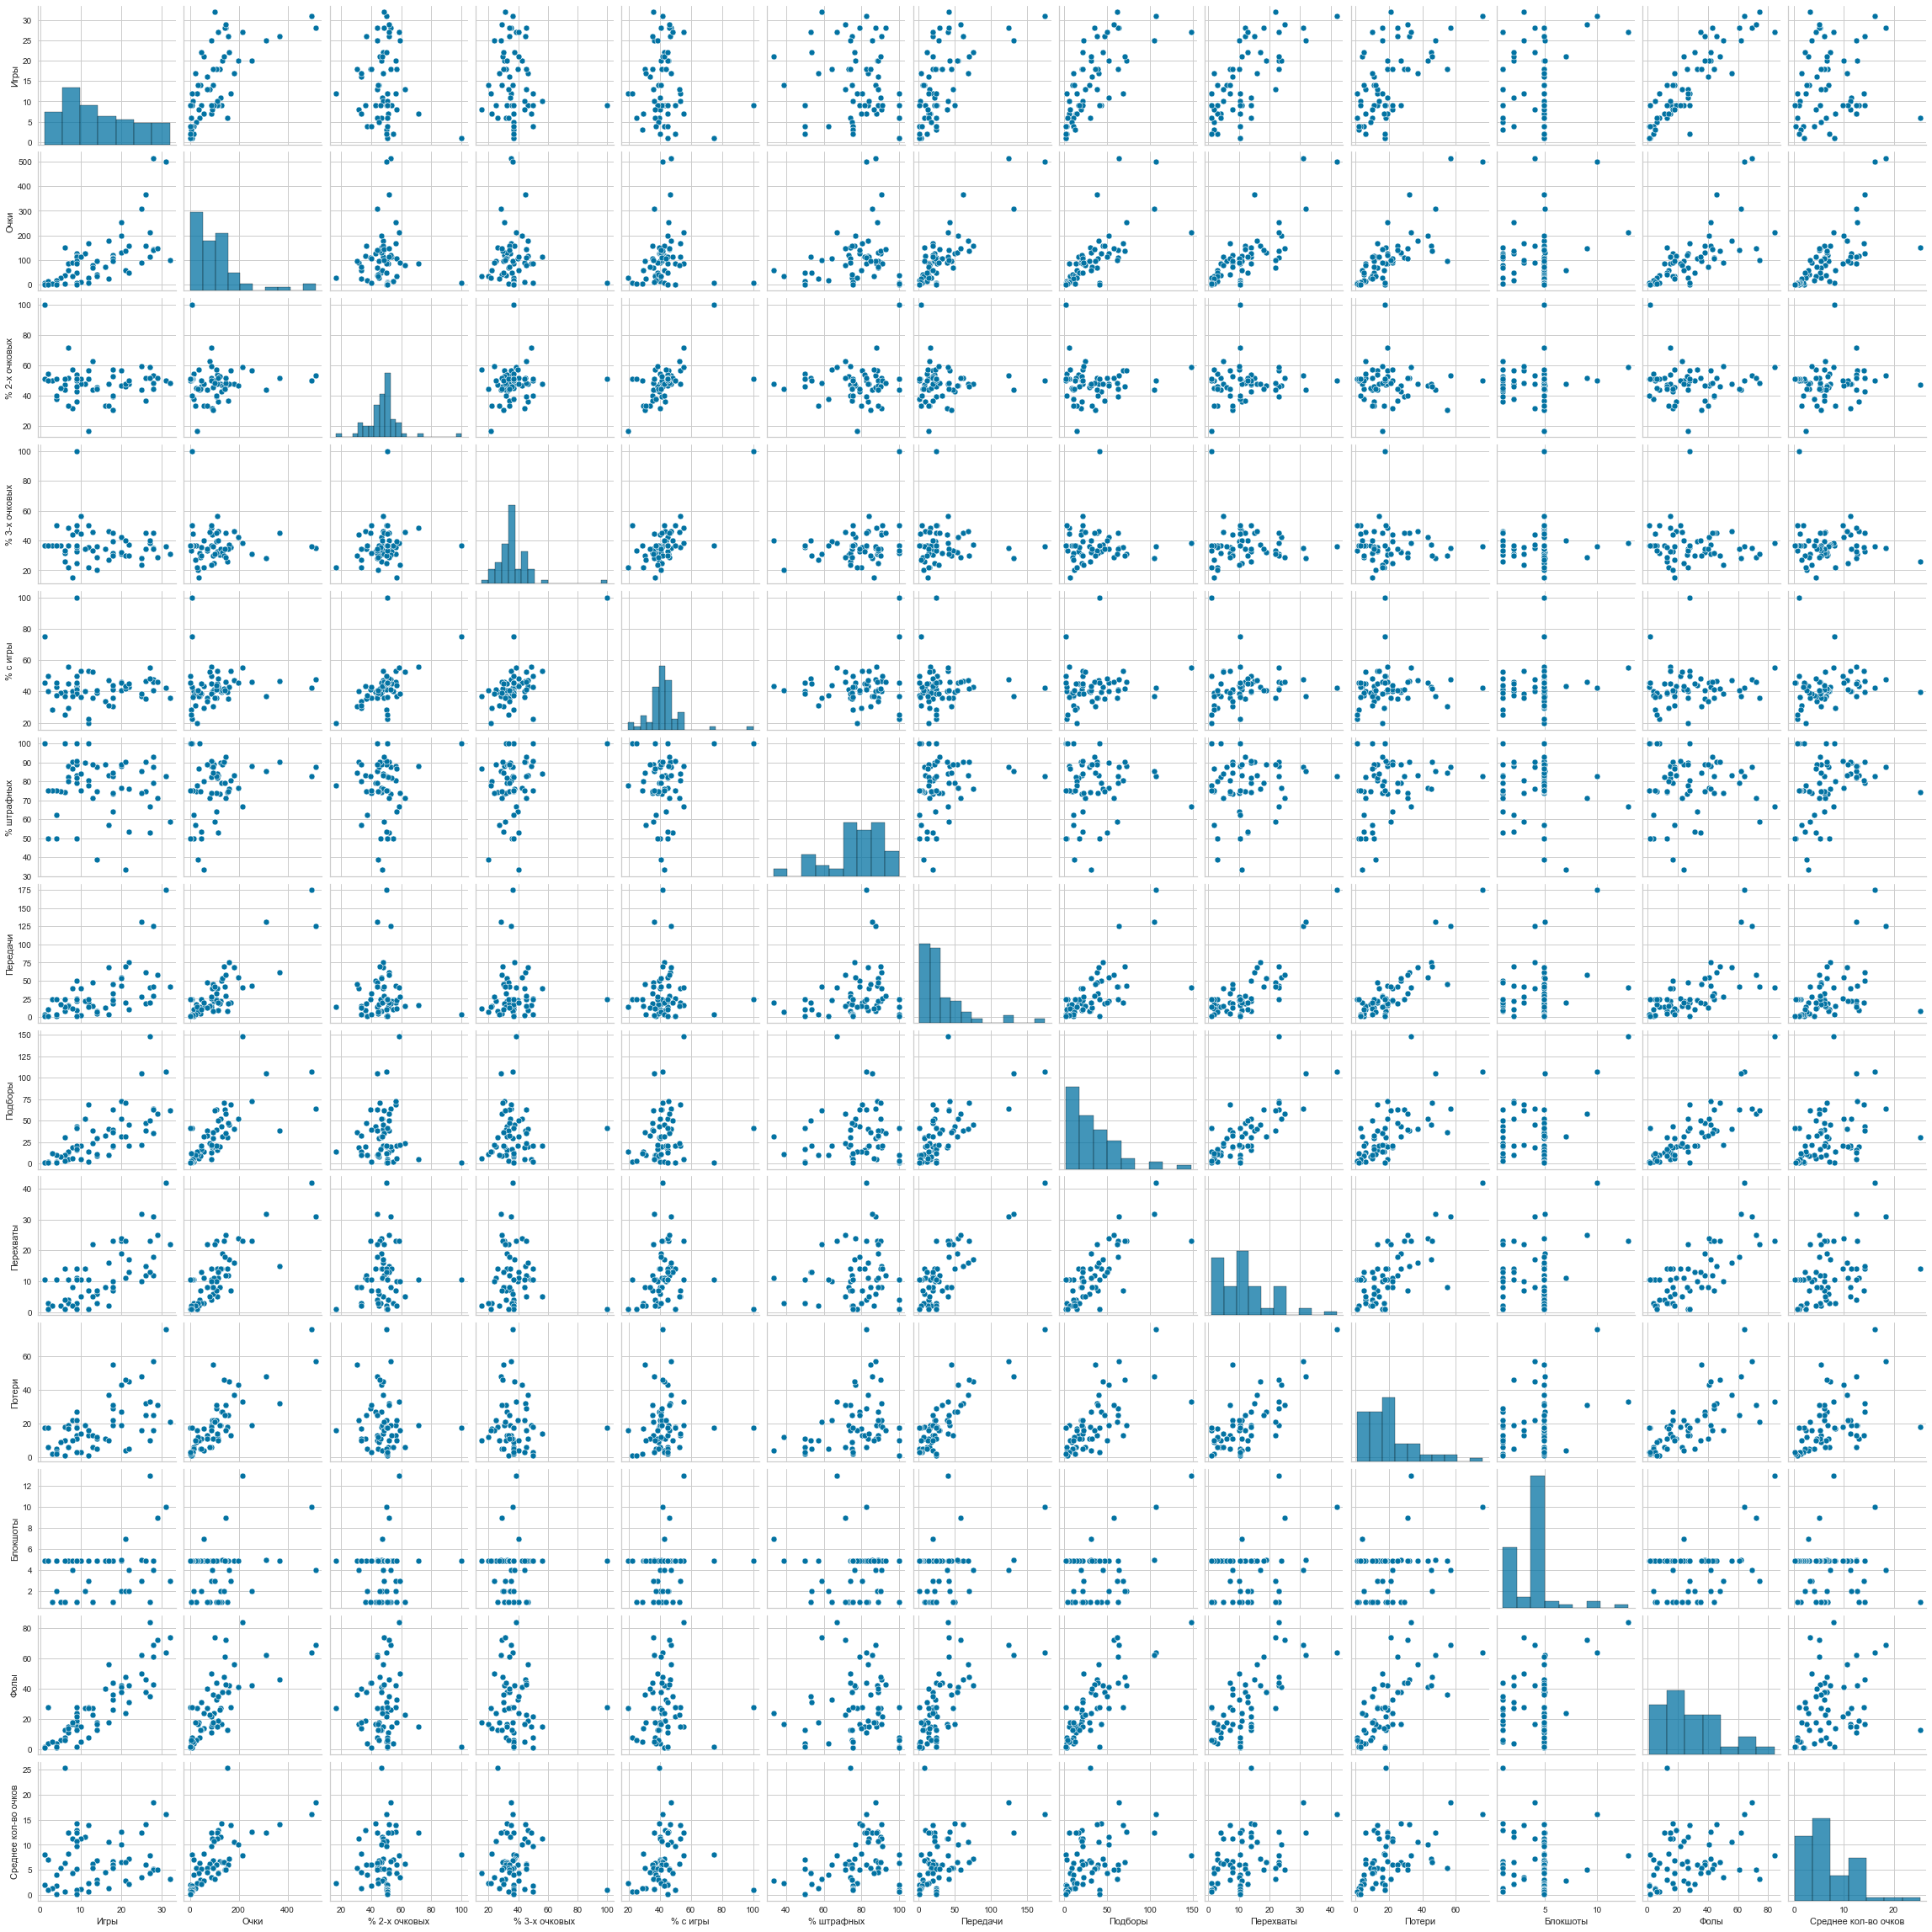

In [44]:
sns.pairplot(positions['Защитник'])

<AxesSubplot:ylabel='Frequency'>

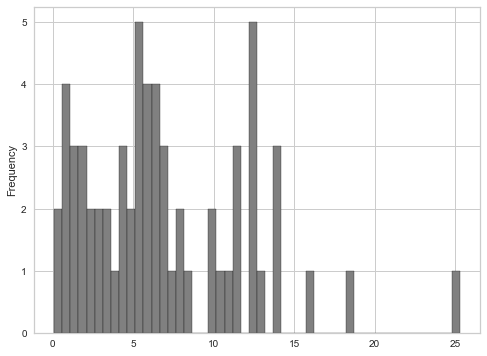

In [48]:
positions['Защитник']['Среднее кол-во очков'].plot(kind='hist', bins=50, figsize=(8,6), facecolor='grey',edgecolor='black')

<AxesSubplot:>

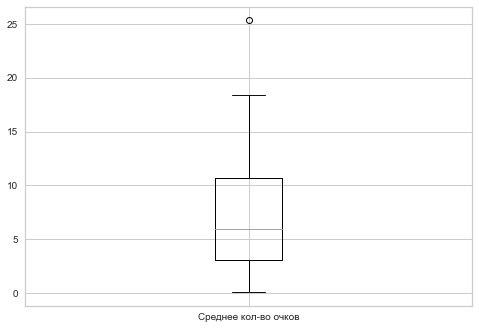

In [49]:
positions['Защитник'].boxplot('Среднее кол-во очков')

### Нападающий

In [51]:
positions['Нападающий'].describe()

,Игры,Очки,% 2-х очковых,% 3-х очковых,% с игры,% штрафных,Передачи,Подборы,Перехваты,Потери,Блокшоты,Фолы,Среднее кол-во очков
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.00000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,15.772727,106.204545,51.768182,36.638636,43.204545,71.279545,21.804545,45.82500,10.511364,16.104545,4.200000,28.818182,6.393182
std,7.007848,106.042681,12.791145,13.743535,12.582989,12.938973,18.524879,39.61728,9.258239,13.536410,2.439786,19.782859,5.154605
min,4.000000,2.000000,25.000000,12.500000,20.000000,40.000000,1.000000,2.00000,1.000000,1.000000,1.000000,1.000000,0.300000
25%,10.000000,26.000000,45.225000,29.400000,34.875000,60.525000,9.000000,15.50000,5.750000,5.000000,2.750000,16.750000,2.700000
50%,17.000000,81.000000,51.850000,35.000000,43.900000,75.000000,18.000000,39.00000,9.500000,12.500000,4.900000,23.500000,4.850000
75%,19.250000,127.000000,56.150000,38.125000,47.850000,79.400000,27.000000,64.00000,12.250000,22.250000,5.000000,39.000000,10.600000
max,32.000000,518.000000,100.000000,100.000000,100.000000,100.000000,91.000000,210.00000,56.000000,61.000000,13.000000,83.000000,18.500000


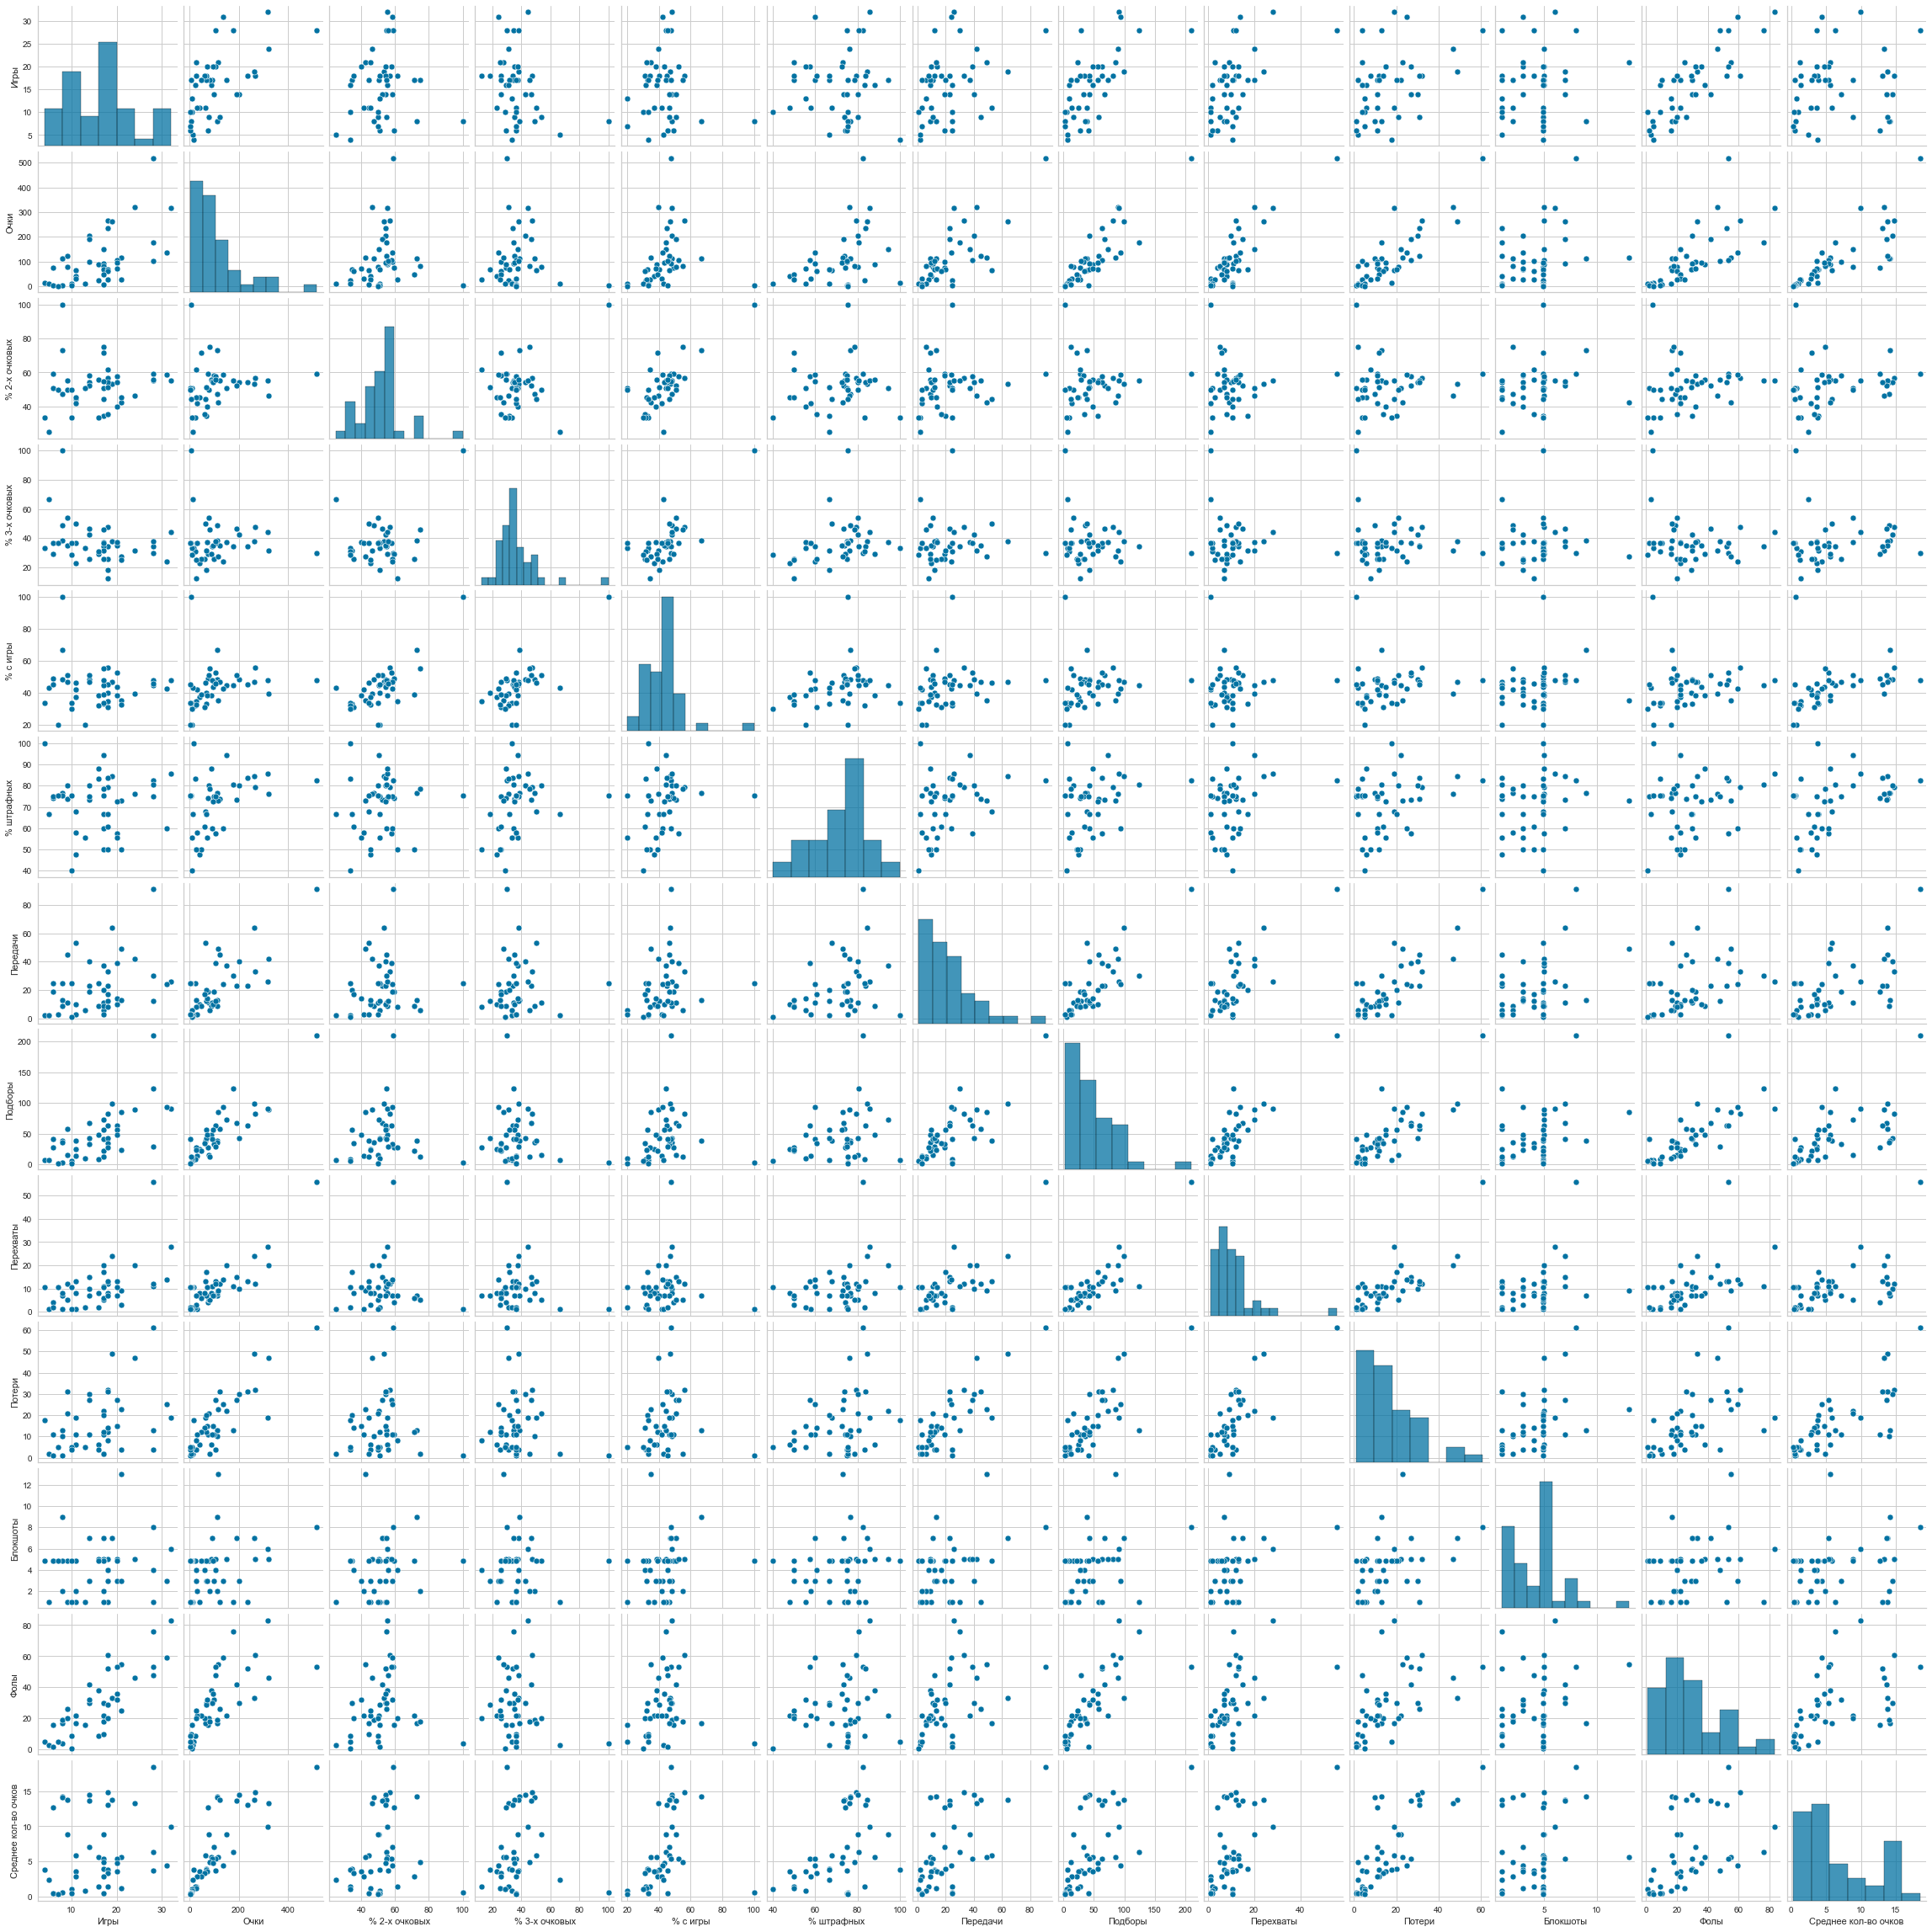

In [52]:
sns.pairplot(positions['Нападающий'])

<AxesSubplot:ylabel='Frequency'>

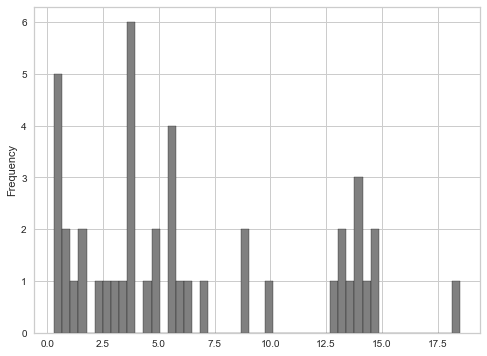

In [53]:
positions['Нападающий']['Среднее кол-во очков'].plot(kind='hist', bins=50, figsize=(8,6), facecolor='grey',edgecolor='black')

<AxesSubplot:>

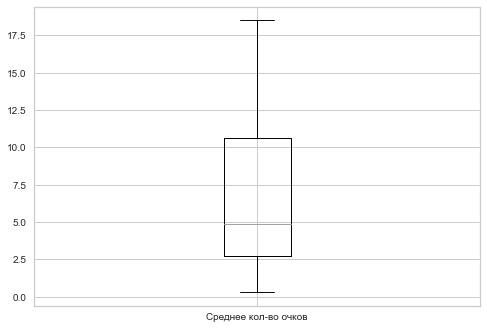

In [54]:
positions['Нападающий'].boxplot('Среднее кол-во очков')

### Нападающий - центр

In [55]:
positions['Нападающий - центр'].describe()

,Игры,Очки,% 2-х очковых,% 3-х очковых,% с игры,% штрафных,Передачи,Подборы,Перехваты,Потери,Блокшоты,Фолы,Среднее кол-во очков
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,13.071429,102.250000,54.892857,36.157143,50.746429,78.142857,18.507143,49.307143,11.375000,18.492857,6.392857,27.560714,6.621429
std,8.414839,110.799326,14.434576,14.413199,16.545772,13.458012,17.498062,42.831253,8.344021,16.945095,6.502930,22.425751,4.400451
min,2.000000,1.000000,33.300000,20.000000,33.300000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000
25%,7.000000,19.750000,45.650000,26.525000,41.150000,74.800000,2.750000,19.000000,5.000000,6.000000,3.750000,10.750000,3.350000
50%,10.000000,83.000000,51.450000,35.350000,45.800000,78.250000,12.500000,40.150000,10.500000,17.600000,4.900000,21.500000,7.200000
75%,17.250000,129.250000,60.900000,37.000000,58.225000,87.750000,28.250000,65.000000,11.250000,24.000000,4.925000,43.250000,8.325000
max,31.000000,485.000000,100.000000,100.000000,100.000000,100.000000,63.000000,180.000000,38.000000,88.000000,29.000000,80.000000,19.400000


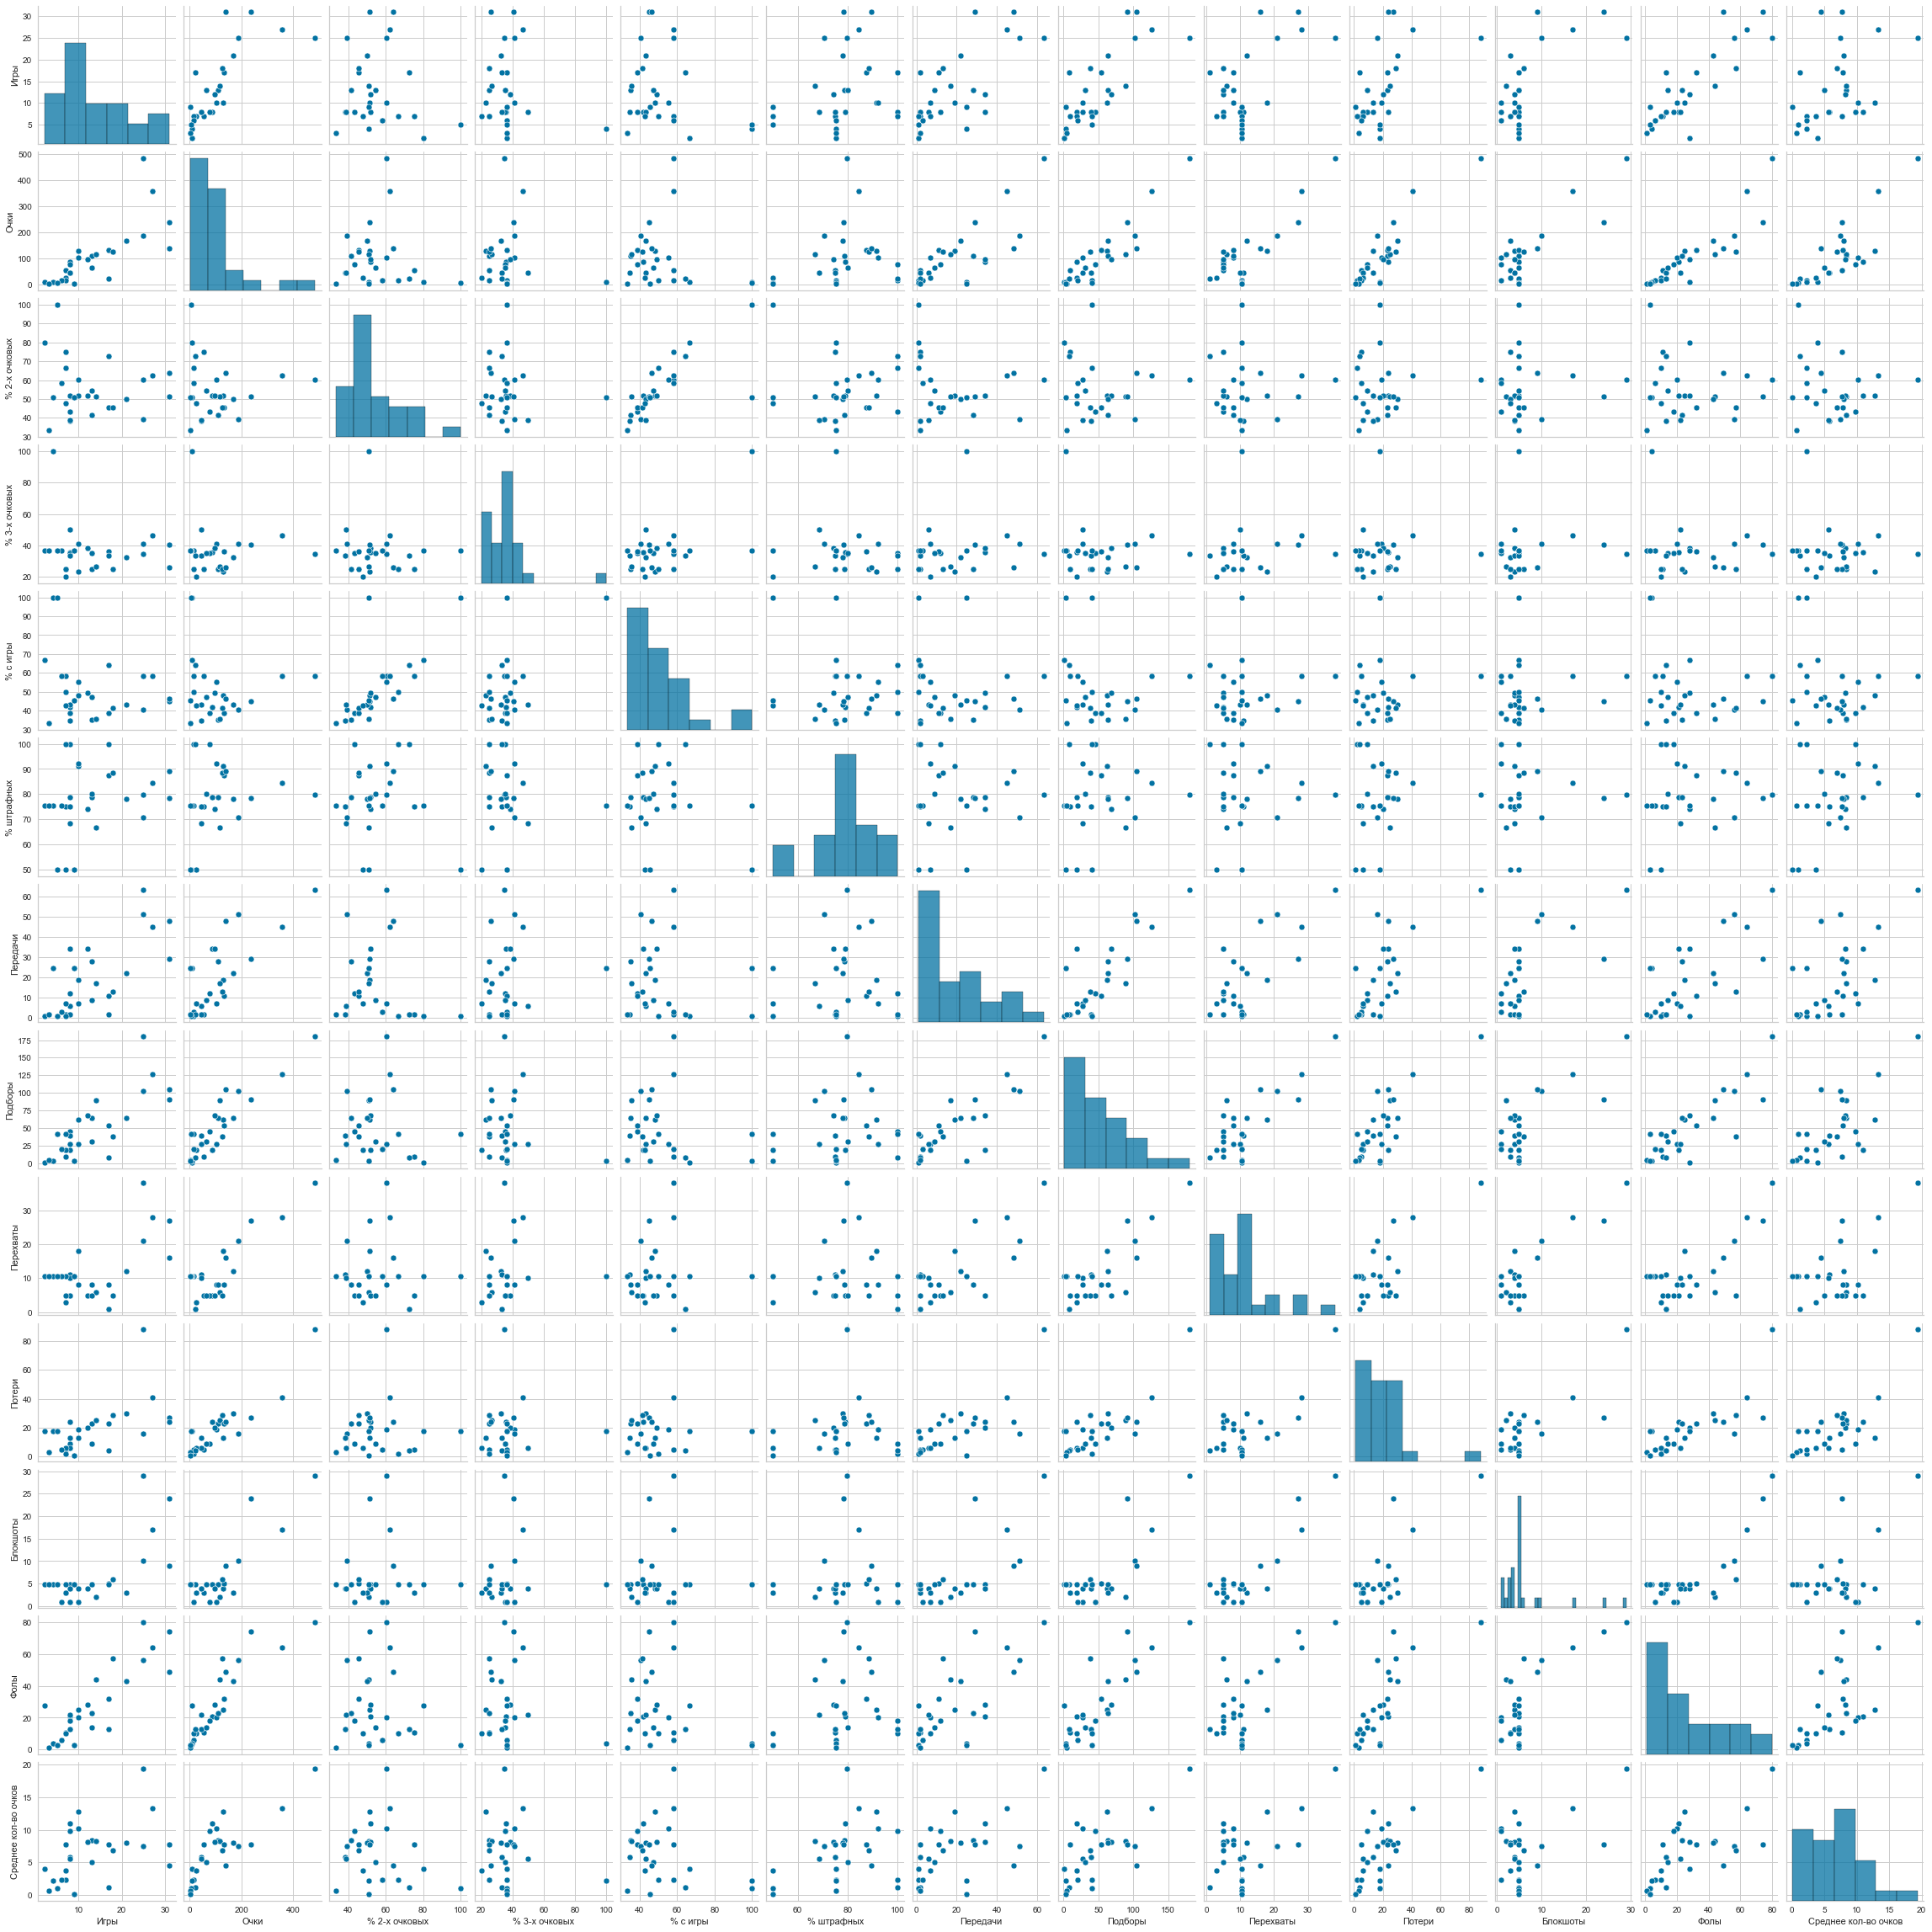

In [56]:
sns.pairplot(positions['Нападающий - центр'])

<AxesSubplot:ylabel='Frequency'>

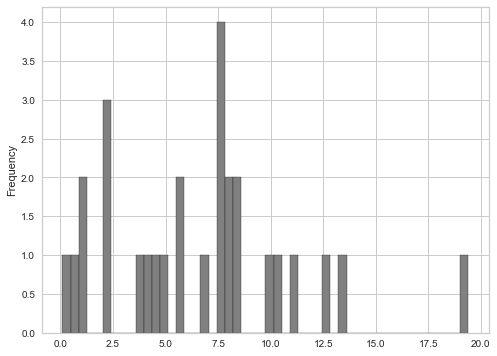

In [57]:
positions['Нападающий - центр']['Среднее кол-во очков'].plot(kind='hist', bins=50, figsize=(8,6), facecolor='grey',edgecolor='black')

<AxesSubplot:>

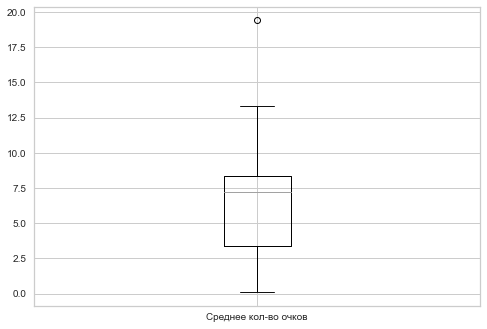

In [59]:
positions['Нападающий - центр'].boxplot('Среднее кол-во очков')

### Разыгрывающий

In [62]:
positions['Разыгрывающий'].describe()

,Игры,Очки,% 2-х очковых,% 3-х очковых,% с игры,% штрафных,Передачи,Подборы,Перехваты,Потери,Блокшоты,Фолы,Среднее кол-во очков
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,15.285714,110.761905,44.285714,33.757143,38.871429,79.233333,38.619048,29.966667,10.714286,22.000000,3.661905,28.285714,7.285714
std,7.504284,82.206998,9.735517,8.510968,7.273592,15.595363,26.102636,15.342208,6.497252,14.328294,1.604829,15.116689,5.441625
min,2.000000,1.000000,25.000000,12.500000,20.000000,50.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,0.500000
25%,10.000000,38.000000,42.100000,27.800000,36.100000,66.700000,19.000000,22.000000,6.000000,13.000000,2.000000,18.000000,2.600000
50%,18.000000,111.000000,45.000000,35.300000,40.500000,80.800000,35.000000,31.000000,12.000000,18.000000,4.900000,30.000000,6.200000
75%,20.000000,167.000000,50.000000,39.200000,42.600000,89.400000,53.000000,40.000000,14.000000,32.000000,4.900000,39.000000,9.600000
max,29.000000,292.000000,62.200000,47.800000,50.900000,100.000000,101.000000,63.000000,24.000000,50.000000,5.000000,55.000000,21.600000


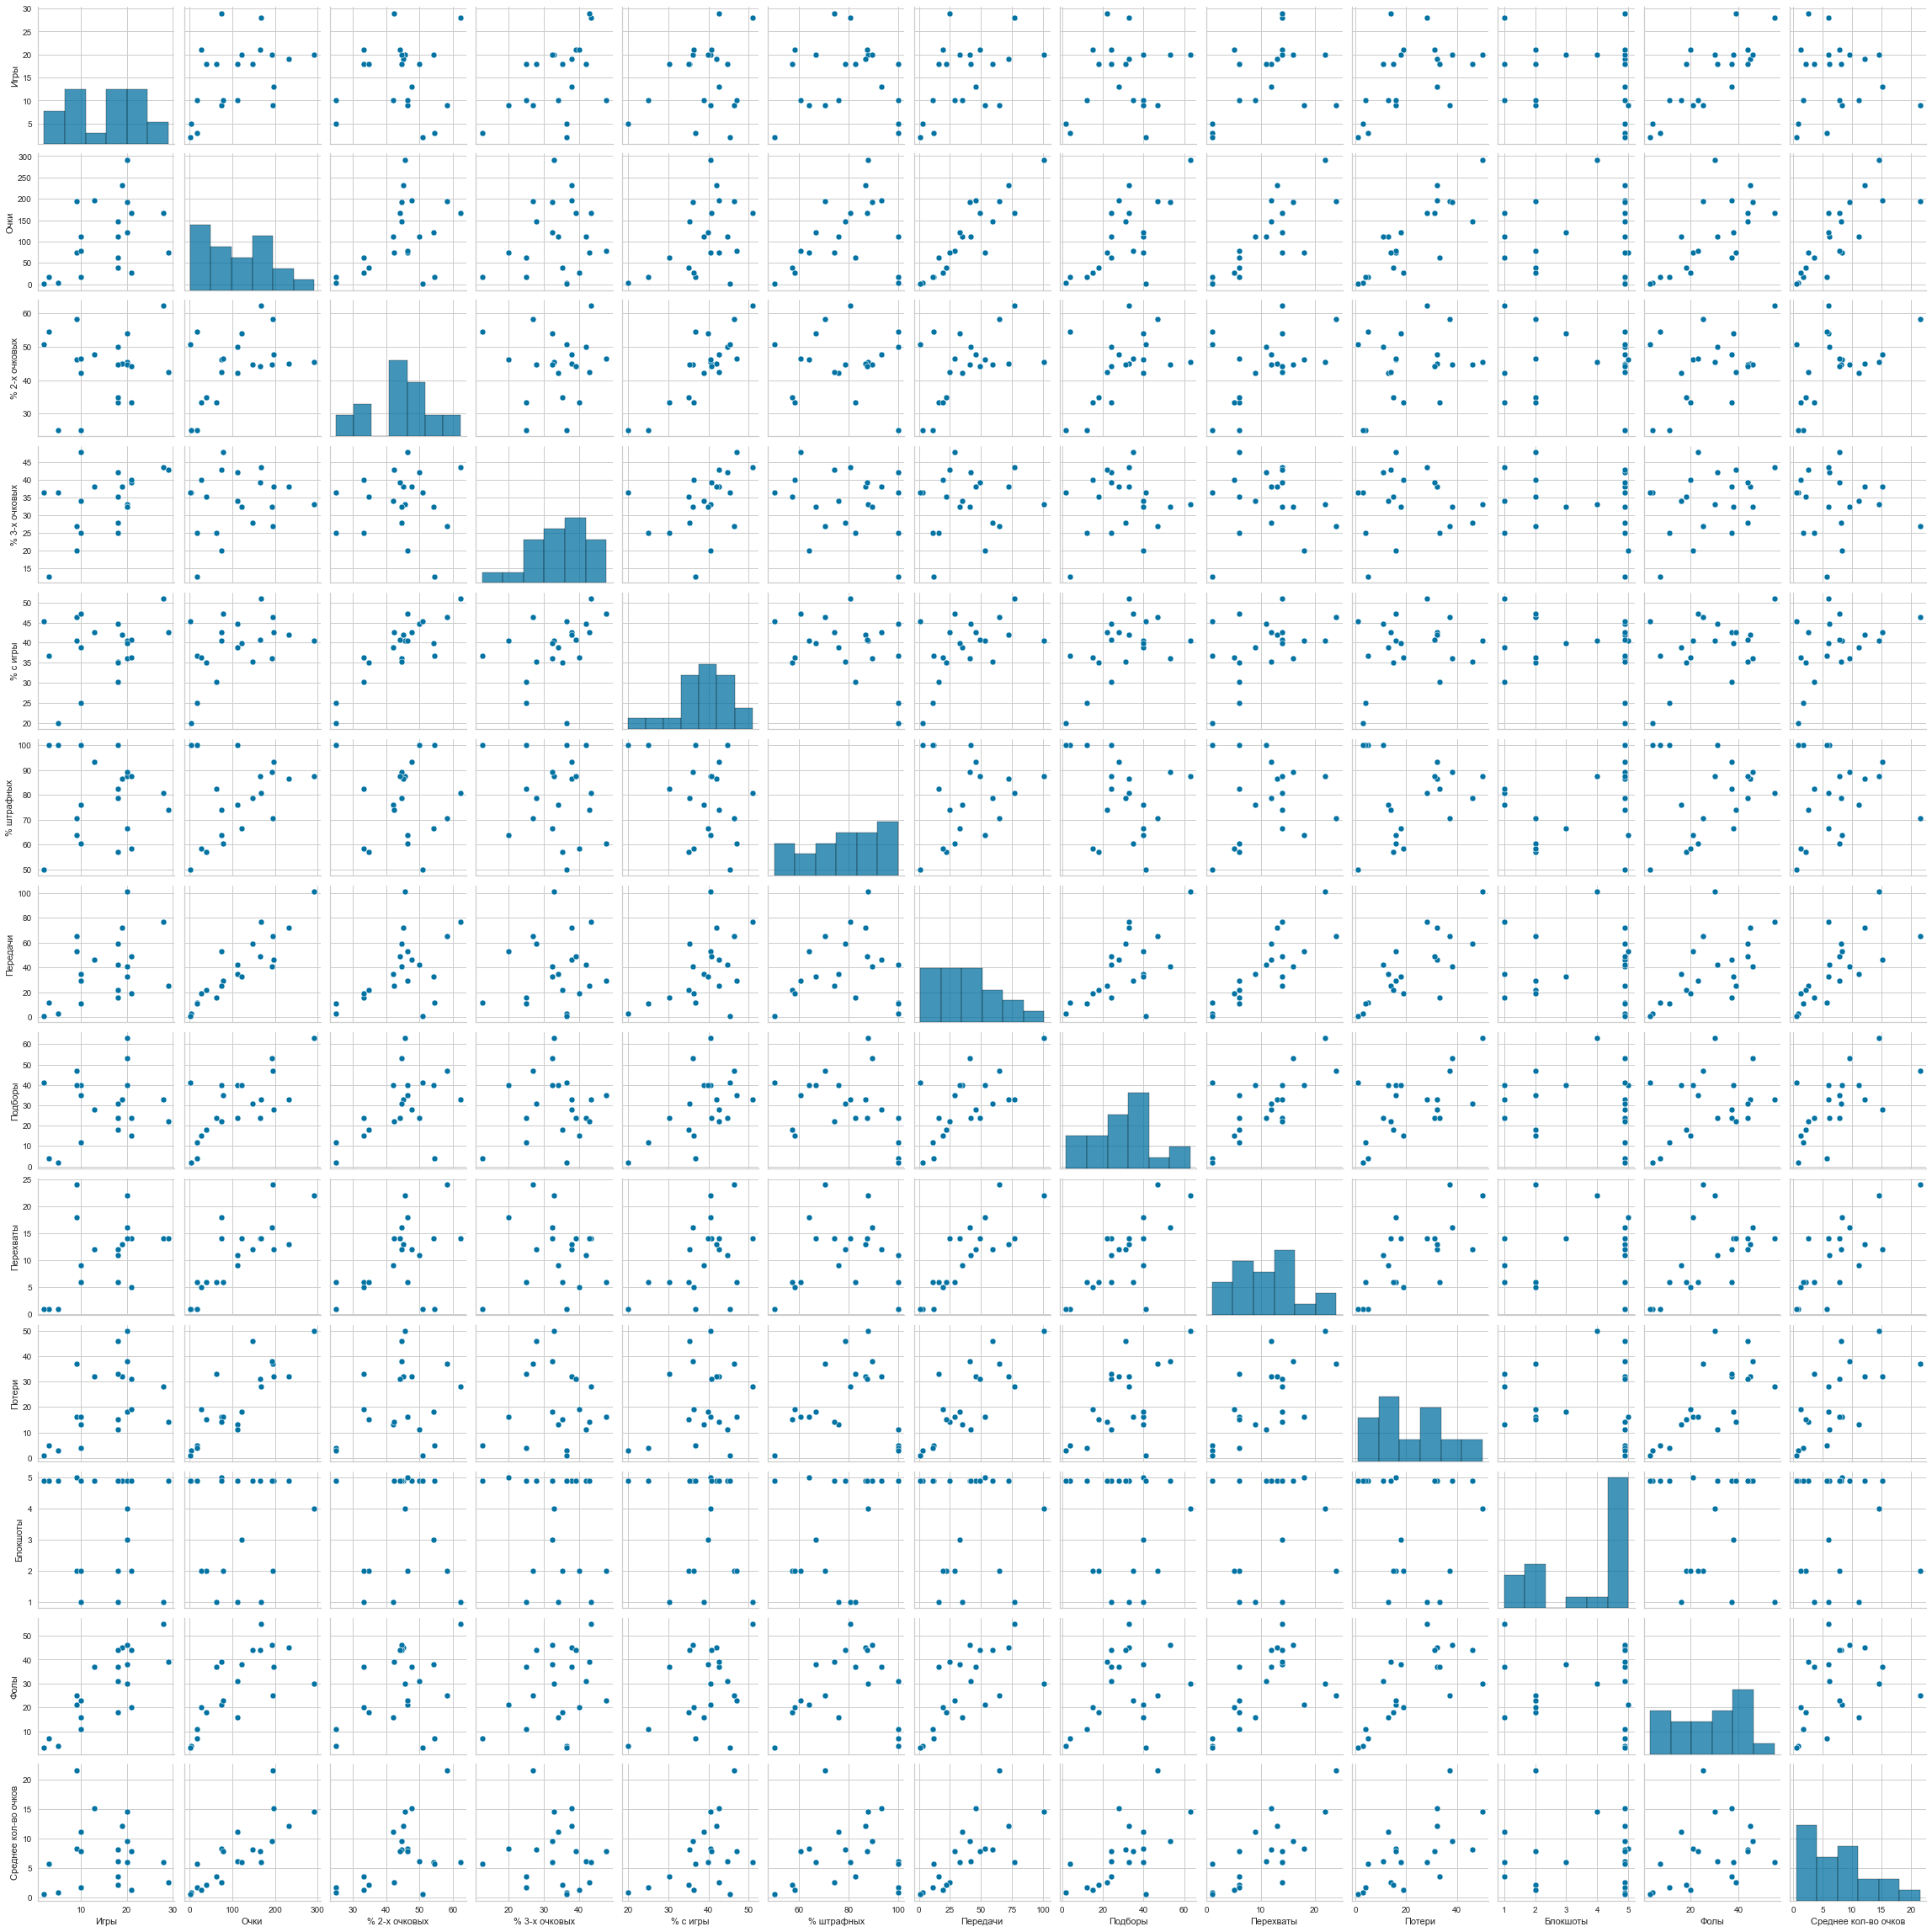

In [63]:
sns.pairplot(positions['Разыгрывающий'])

<AxesSubplot:ylabel='Frequency'>

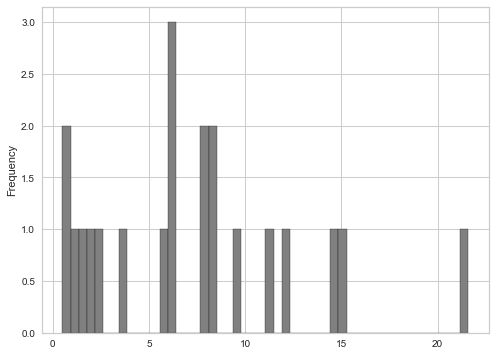

In [65]:
positions['Разыгрывающий']['Среднее кол-во очков'].plot(kind='hist', bins=50, figsize=(8,6), facecolor='grey',edgecolor='black')

<AxesSubplot:>

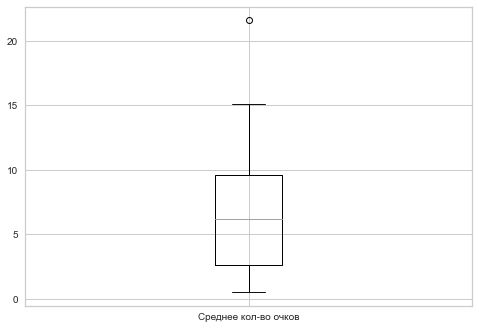

In [69]:
positions['Разыгрывающий'].boxplot('Среднее кол-во очков')

### Центровой

In [66]:
positions['Центровой'].describe()

,Игры,Очки,% 2-х очковых,% 3-х очковых,% с игры,% штрафных,Передачи,Подборы,Перехваты,Потери,Блокшоты,Фолы,Среднее кол-во очков
count,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.233333,91.700000,55.613333,37.69000,52.053333,70.996667,14.140000,57.300000,7.383333,13.920000,7.030000,26.500000,6.170000
std,7.527803,95.924234,8.494450,13.96931,8.385650,16.161075,13.900052,63.779334,6.360822,8.364061,6.986151,17.868775,4.002684
min,3.000000,4.000000,41.700000,20.00000,37.000000,35.000000,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000,0.300000
25%,9.250000,31.250000,50.000000,36.50000,47.925000,60.450000,5.000000,20.250000,3.250000,7.250000,2.000000,14.250000,2.050000
50%,14.500000,65.000000,53.850000,36.50000,50.850000,74.750000,9.500000,35.000000,5.000000,12.000000,4.950000,20.500000,7.050000
75%,20.250000,102.250000,61.150000,36.50000,57.000000,82.475000,21.700000,77.250000,10.500000,18.750000,10.500000,36.000000,9.525000
max,30.000000,408.000000,75.000000,100.00000,70.700000,100.000000,57.000000,315.000000,25.000000,31.000000,26.000000,82.000000,13.600000


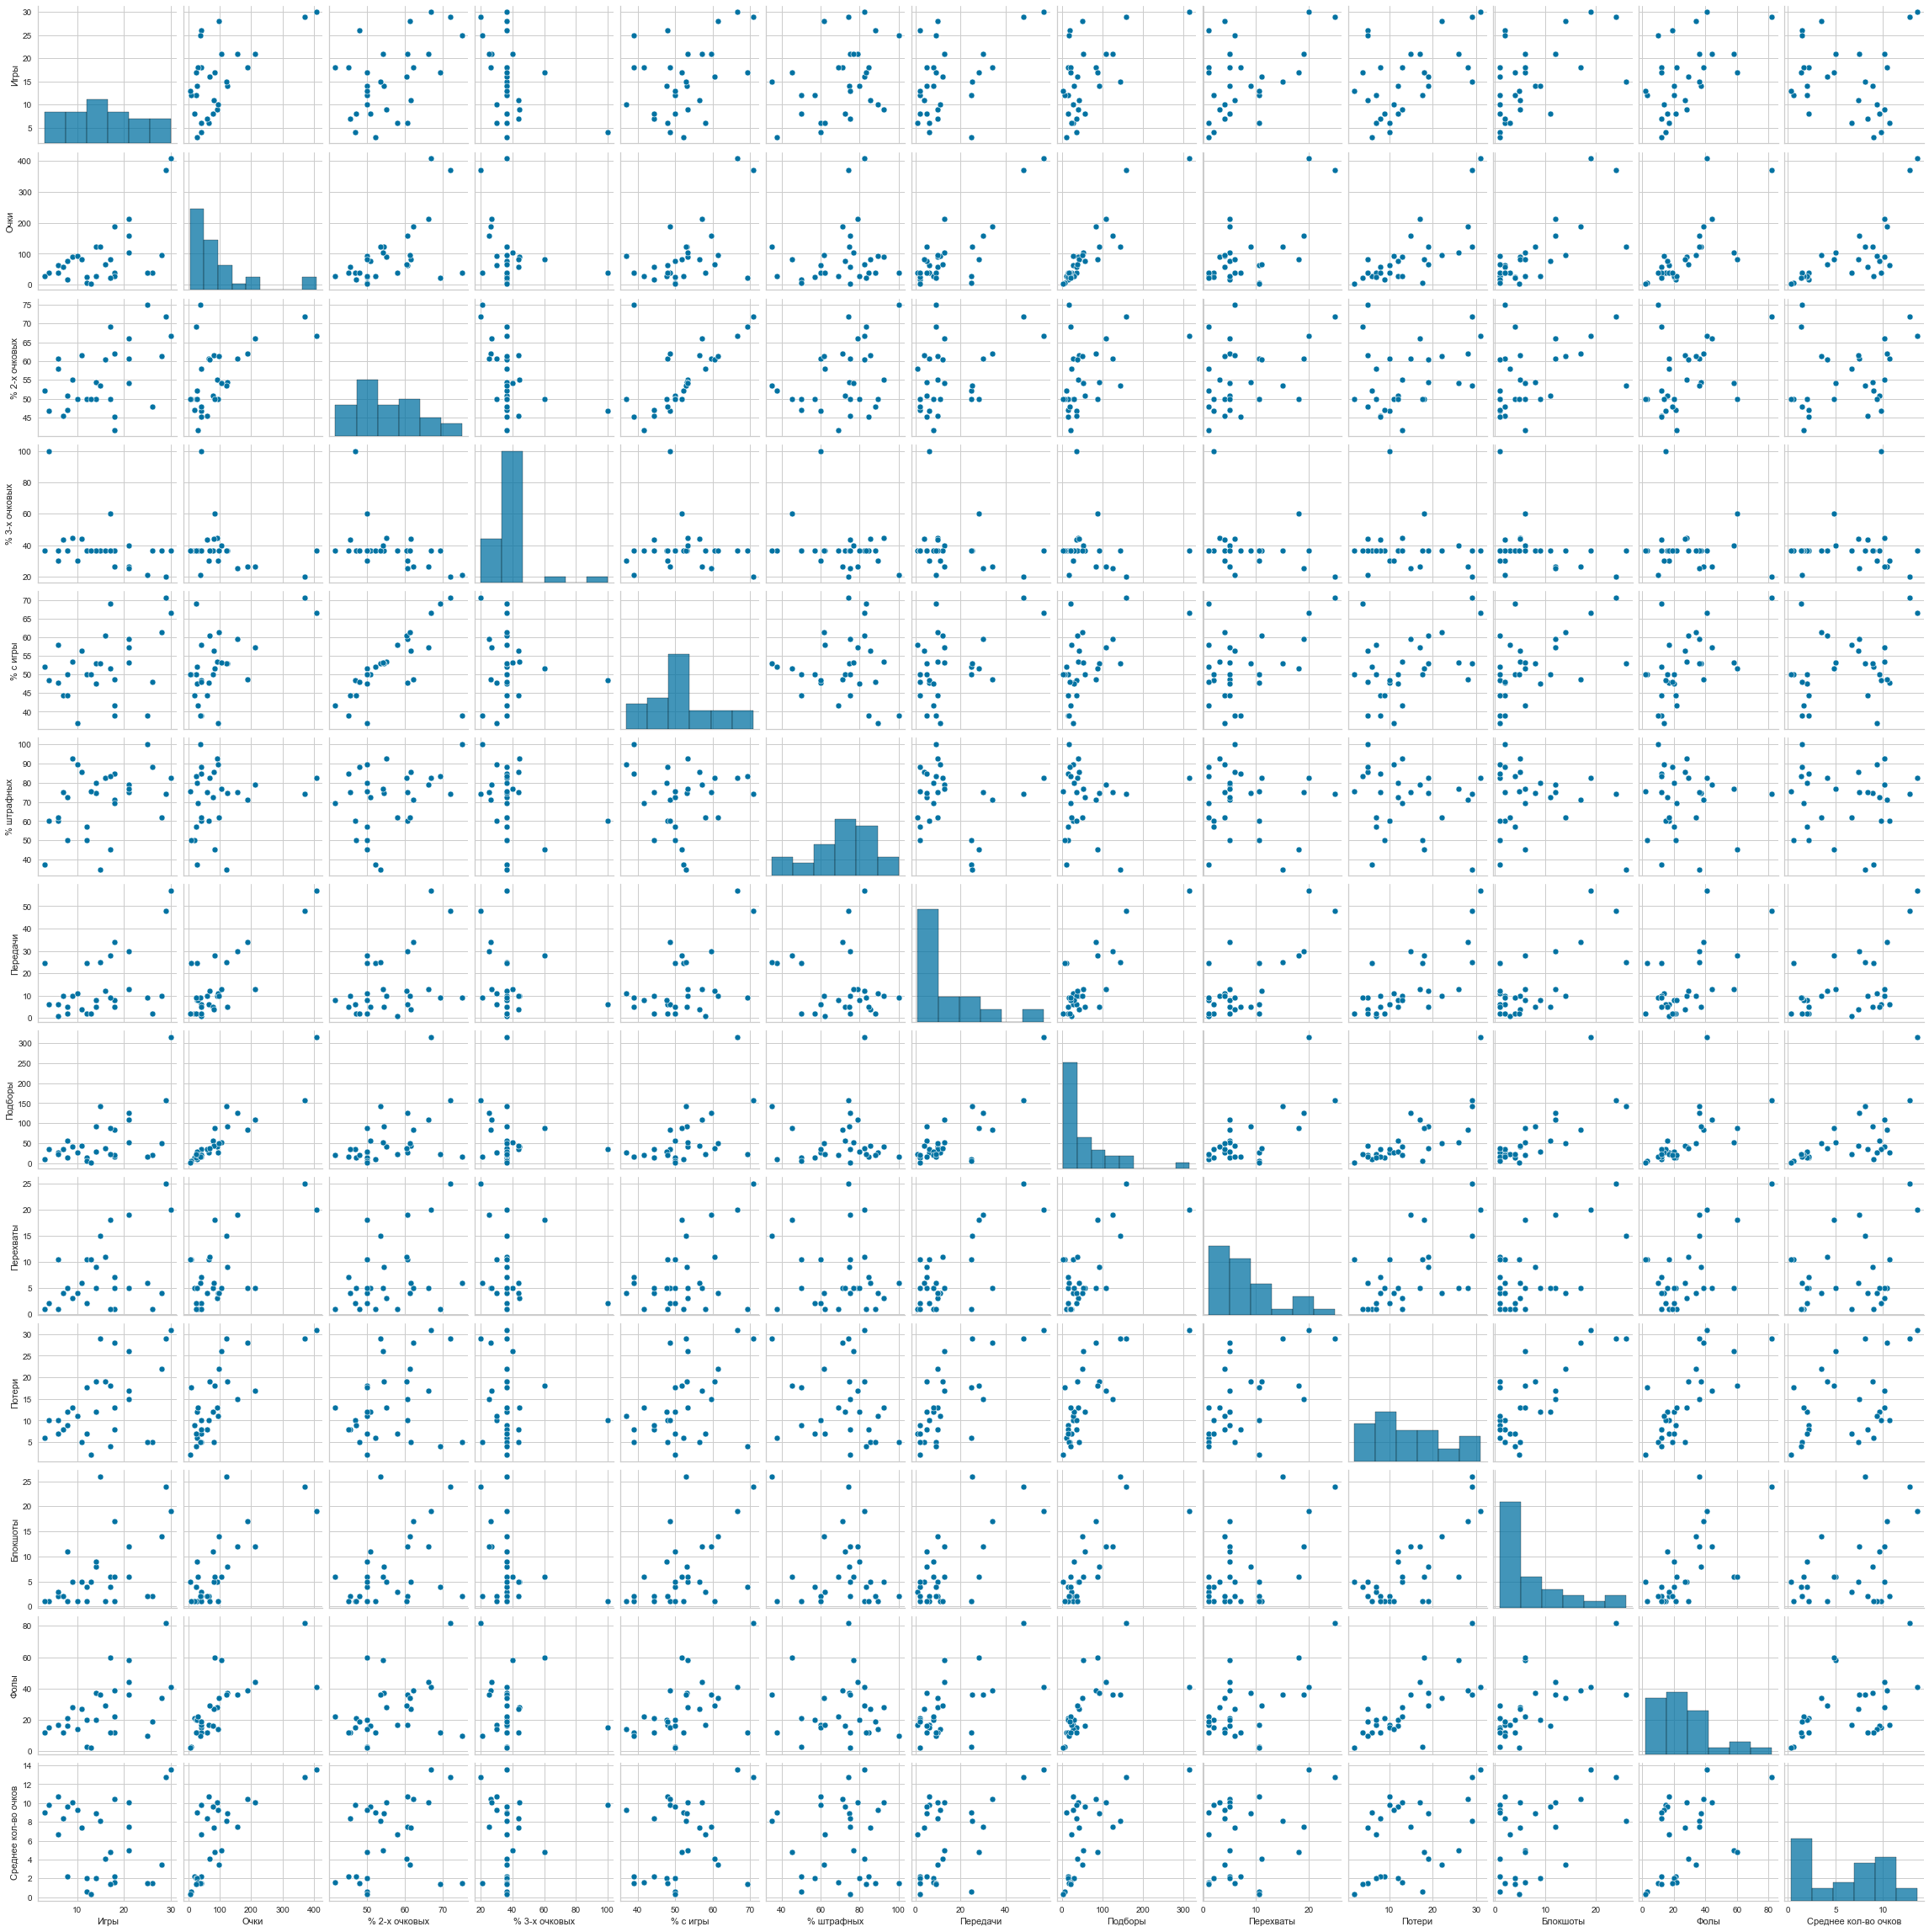

In [67]:
sns.pairplot(positions['Центровой'])

<AxesSubplot:ylabel='Frequency'>

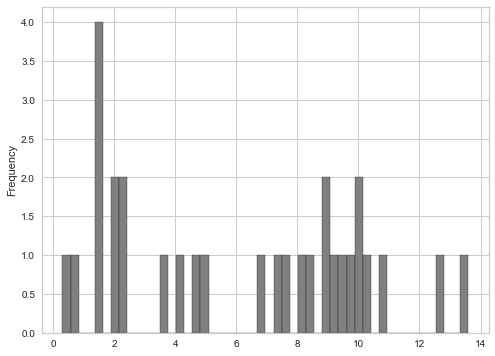

In [68]:
positions['Центровой']['Среднее кол-во очков'].plot(kind='hist', bins=50, figsize=(8,6), facecolor='grey',edgecolor='black')

<AxesSubplot:>

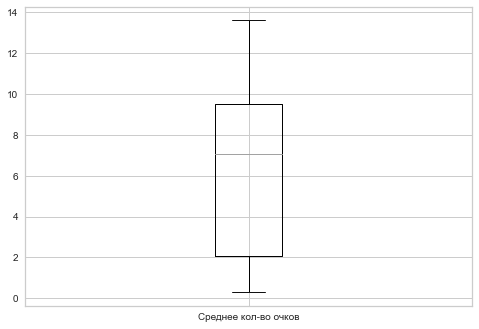

In [73]:
positions['Центровой'].boxplot('Среднее кол-во очков')